# Projeto 2 Ciência dos Dados Insper

## Alunos: 
* Pedro De Lucca 
* Pedro Dutra
* Fernando Mattos

## 1. Introdução
### Contexto

O Acidente Vascular Cerebral (AVC) acontece quando vasos que levam sangue ao cérebro entopem ou se rompem, provocando a paralisia na área cerebral que ficou sem circulação sanguínea. De acordo com a Organização Mundial da Saúde (OMS), o AVC corresponde a aproximadamente <a href="https://www.em.com.br/app/noticia/bem-viver/2022/04/18/interna_bem_viver,1360730/avc-e-a-segunda-causa-de-mortes-no-mundo-e-avanca-nos-paises-de-baixa-renda.shtml" target="_blank">11%</a> das mortes no mundo todo e, hoje, já é a principal causa de morte no Brasil ao vitimar uma média de 307 brasileiros por dia em 2022, número que supera em quase 150% os óbitos por covid-19 nesse mesmo período (<a href="https://www.uol.com.br/vivabem/noticias/redacao/2022/10/29/cresce-numero-de-brasileiros-mortos-por-acidente-vascular-cerebral.htm" target="_blank">Agência Brasil</a>). Por isso, o intuito deste projeto é entender qual perfil de pessoa é mais propenso a sofrer um acidente como esse, tendo como base um dataset composto por:

1. `id`: Número único de identificação.
1. `gender`: Gênero
    1. `Male`: Masculino;
    1. `Female`: Feminino;
    1. `Other`: Outro.
1. `age`: Faixa etária.
1. `hypertension`: Hipertensão
    1. `0`: Pacientes sem hipertensão;
    1. `1`: Pacientes hipoertensos.
1. `heart_disease`: Doenças cardiovascuares
    1. `0`: Pacientes sem doenças cardiovasculares;
    1. `1`: Pacientes cardíacos.
1. `ever_married`: Casado
    1. `No`: Nunca foi casado;
    1. `Yes`: Já foi ou é casado.
1. `work_type`: Tipo de ocupação 
    1. `children`: Criança;
    1. `Govt_jov`: Funcionário público;
    1. `Never_worked`: Nunca trabalhou;
    1. `Private`: Empresa privada;
    1. `Self-employed`: Empreendedor.
1. `Residence_type`: Local de rediência
    1. `Rural`: Rural;
    1. `Urban` Urbano.
1. `avg_glucose_level`: Média do nível de glicose no sangue.
1. `bmi`: Índice de massa corporal.
1. `smoking_status`: Relação com o cigarro
    1. `formerly smoked`: Já fumou;
    1. `never smoked`: Nunca fumou;
    1. `smokes`: Fumante;
    1. `Unknown`: Não se tem informação.
1. `stroke`: AVC
    1. `0`: Pacientes que nunca tiveram AVC;
    1. `1`: Pacientes que já tiveram AVC.


## Importando Bibliotecas

In [129]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Limpeza dos Dados

In [130]:
dados=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [131]:
dados.dropna(inplace=True)

In [132]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [133]:
avc=dados.loc[:,'stroke'].value_counts()
avc

0    4700
1     209
Name: stroke, dtype: int64

In [134]:
avc_sim=dados['stroke']==1
avc_nao=dados['stroke']==0
dados_avc_sim=dados[avc_sim]
dados_avc_nao=dados[avc_nao]


## Começando a Análise

### Doenças Cardiovsculares

In [135]:
# Com AVC
doenca_coracao_avc_sim=dados_avc_sim['heart_disease'].value_counts(True)
doenca_coracao_avc_sim


0    0.808612
1    0.191388
Name: heart_disease, dtype: float64

In [136]:
# Sem AVC
doenca_coracao_avc_nao=dados_avc_nao['heart_disease'].value_counts(True)
doenca_coracao_avc_nao

0    0.956809
1    0.043191
Name: heart_disease, dtype: float64

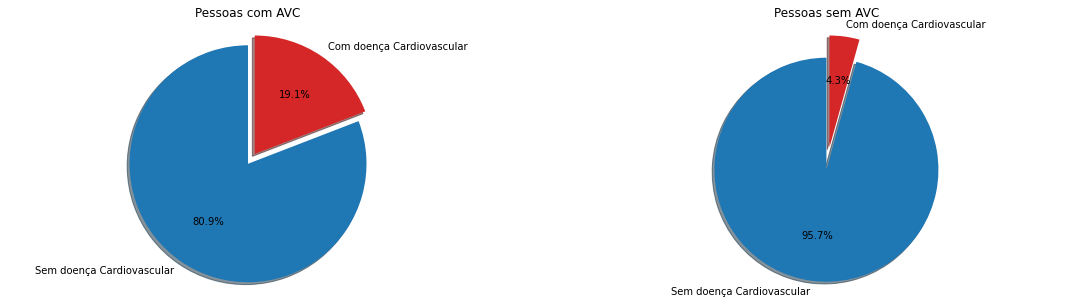

In [137]:
plt.figure(figsize=(19,5))
labels='Sem doença Cardiovascular', 'Com doença Cardiovascular'
explode1=(0,0.1)
explode2=(0,0.2)
plt.subplot(121)
plt.pie(doenca_coracao_avc_sim, labels=labels, explode=explode1, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(doenca_coracao_avc_nao, labels=labels,explode=explode2, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Hipertensão

In [138]:
# Com AVC
hip_avc_sim=dados_avc_sim['hypertension'].value_counts(True)
hip_avc_sim

0    0.712919
1    0.287081
Name: hypertension, dtype: float64

In [139]:
# Sem AVC
hip_avc_nao=dados_avc_nao['hypertension'].value_counts(True)
hip_avc_nao

0    0.916809
1    0.083191
Name: hypertension, dtype: float64

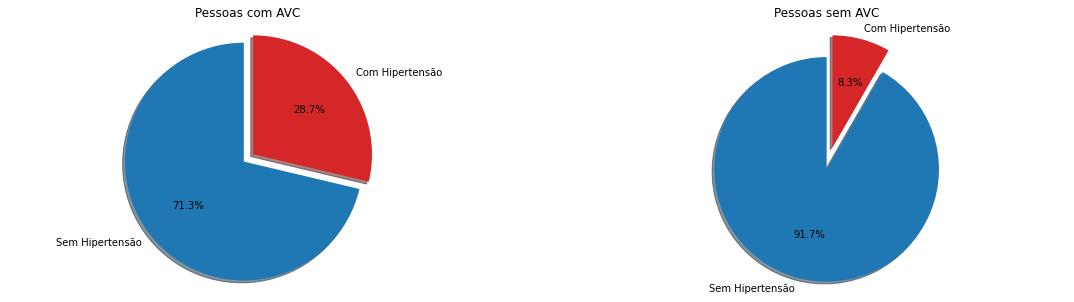

In [140]:
plt.figure(figsize=(19,5))
labels='Sem Hipertensão', 'Com Hipertensão'
explode1=(0,0.1)
explode2=(0,0.2)
plt.subplot(121)
plt.pie(hip_avc_sim, labels=labels, explode=explode1, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(hip_avc_nao, labels=labels,explode=explode2, colors=['tab:blue', 'tab:red'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Fumante

In [190]:
# Com AVC
fumo_avc_sim=dados_avc_sim['smoking_status'].value_counts(True)
fumo_avc_sim

never smoked       0.401914
formerly smoked    0.272727
smokes             0.186603
Unknown            0.138756
Name: smoking_status, dtype: float64

In [189]:
# Sem AVC
fumo_avc_nao=dados_avc_nao['smoking_status'].value_counts(True)
fumo_avc_nao

never smoked       0.376170
Unknown            0.309362
formerly smoked    0.165957
smokes             0.148511
Name: smoking_status, dtype: float64

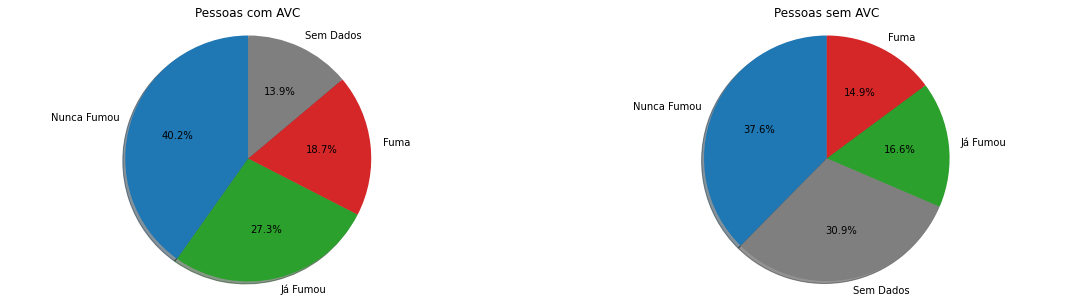

In [200]:
plt.figure(figsize=(19,5))
labels1='Nunca Fumou', 'Já Fumou', 'Fuma', 'Sem Dados'
labels2='Nunca Fumou', 'Sem Dados', 'Já Fumou', 'Fuma'
plt.subplot(121)
plt.pie(fumo_avc_sim, labels=labels1, explode=None, colors=['tab:blue', 'tab:green','tab:red','tab:gray'], autopct='%1.1f%%', shadow=True,
startangle=90)
plt.title('Pessoas com AVC')
plt.axis('equal')

plt.subplot(122)
plt.pie(fumo_avc_nao, labels=labels2, explode=None, colors=['tab:blue', 'tab:gray','tab:green','tab:red'], autopct='%1.1f%%', shadow=True, 
startangle=90)
plt.title('Pessoas sem AVC')
plt.axis('equal')
plt.show()

### Idade

In [143]:
dados['age'].describe()

count    4909.000000
mean       42.865374
std        22.555115
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

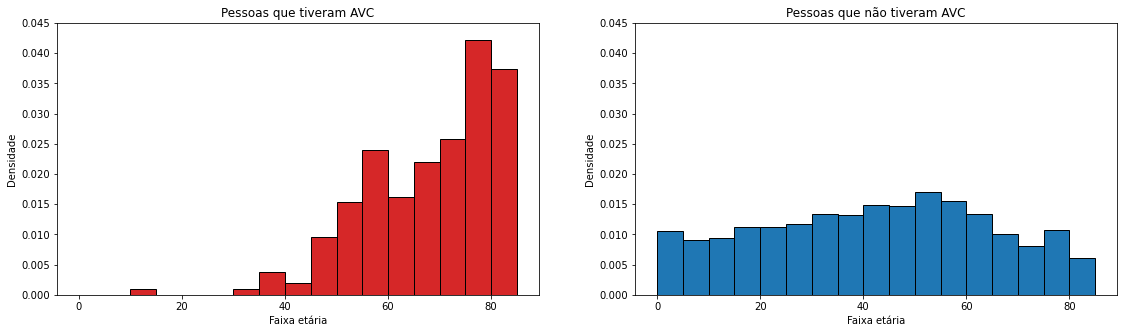

In [144]:
plt.figure(figsize=(19,5))

idade = np.arange(0,90,5)

plt.subplot(121)
plt.hist(dados_avc_sim['age'], bins = idade, edgecolor='black',density=True, color='tab:red')
plt.title('Pessoas que tiveram AVC')
plt.xlabel('Faixa etária')
plt.ylabel('Densidade')
plt.ylim(0,0.045)

plt.subplot(122)
plt.hist(dados_avc_nao['age'], bins = idade, edgecolor='black',density=True, color='tab:blue')
plt.title('Pessoas que não tiveram AVC')
plt.xlabel('Faixa etária')
plt.ylabel('Densidade')
plt.ylim(0,0.045)

plt.show()

### Nível de glicose no sangue

In [145]:
dados['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

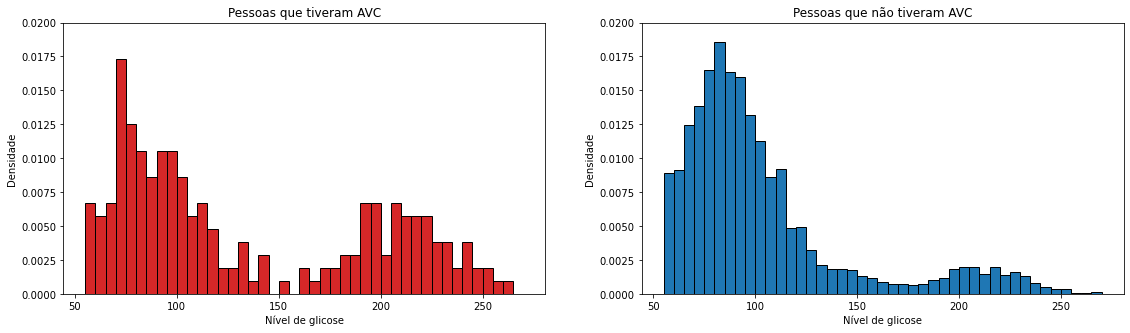

In [146]:
plt.figure(figsize=(19,5))

glicose = np.arange(55,275,5)

plt.subplot(121)
plt.hist(dados_avc_sim['avg_glucose_level'], bins = glicose, edgecolor='black',density=True, color='tab:red')
plt.title('Pessoas que tiveram AVC')
plt.xlabel('Nível de glicose')
plt.ylabel('Densidade')
plt.ylim(0,0.02)

plt.subplot(122)
plt.hist(dados_avc_nao['avg_glucose_level'], bins = glicose, edgecolor='black',density=True, color='tab:blue')
plt.title('Pessoas que não tiveram AVC')
plt.xlabel('Nível de glicose')
plt.ylabel('Densidade')
plt.ylim(0,0.02)
plt.show()

### Massa Corporal

In [147]:
dados['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

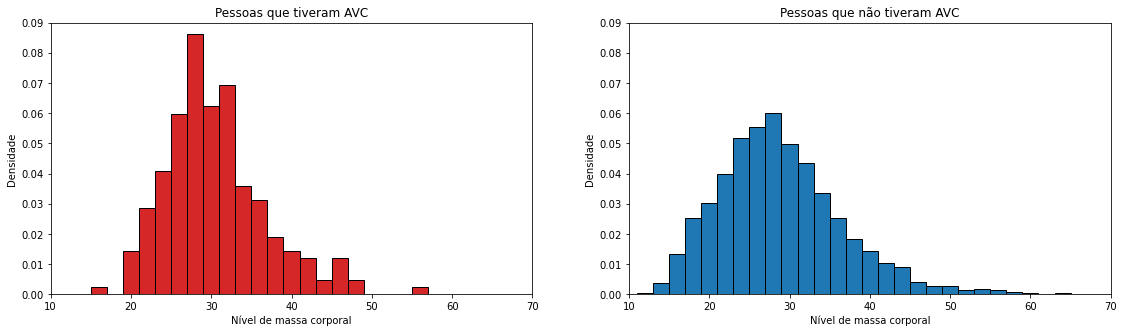

In [196]:
plt.figure(figsize=(19,5))

masssa_corporal = np.arange(5,105,2)

plt.subplot(121)
plt.hist(dados_avc_sim['bmi'], bins = masssa_corporal, edgecolor='black',density=True, color='tab:red')
plt.title('Pessoas que tiveram AVC')
plt.xlabel('Nível de massa corporal')
plt.ylabel('Densidade')
plt.ylim(0,0.09)
plt.xlim(10,70) # Desconsideramos os outliers das extremidades

plt.subplot(122)
plt.hist(dados_avc_nao['bmi'], bins = masssa_corporal, edgecolor='black',density=True, color='tab:blue')
plt.title('Pessoas que não tiveram AVC')
plt.xlabel('Nível de massa corporal')
plt.ylabel('Densidade')
plt.ylim(0,0.09)
plt.xlim(10,70) # Desconsideramos os outliers das extremidades
plt.show()

#### Outliers Massa corporal

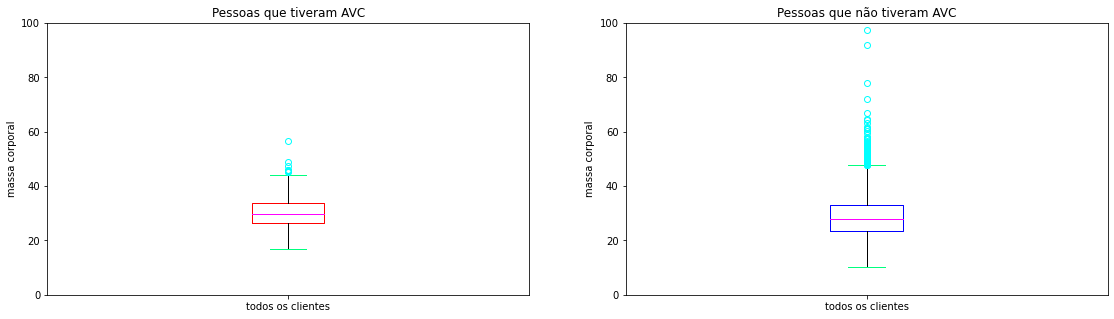

In [193]:
plt.figure(figsize=(19,5))

plt.subplot(121)
plt.boxplot(dados_avc_sim.bmi, labels = ['todos os clientes'],  
            boxprops=dict(color='red'),
            medianprops=dict(color='magenta'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Pessoas que tiveram AVC')
plt.ylabel('massa corporal')
plt.ylim(0,100)

plt.subplot(122)
plt.boxplot(dados_avc_nao.bmi, labels = ['todos os clientes'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='magenta'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Pessoas que não tiveram AVC')
plt.ylabel('massa corporal')
plt.ylim(0,100)

plt.show()

# não foi considerado os outliers depois de massa corporal igual a 70 para a implementação do histograma.